### 1. Meet Professor William Sharpe
<p>An investment may make sense if we expect it to return more money than it costs. But returns are only part of the story because they are risky - there may be a range of possible outcomes. How does one compare different investments that may deliver similar results on average, but exhibit different levels of risks?</p>
<p><img style="float: left ; margin: 5px 20px 5px 1px;" width="200" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_66/img/sharpe.jpeg"></p>
<p>Enter William Sharpe. He introduced the <a href="https://web.stanford.edu/~wfsharpe/art/sr/sr.htm"><em>reward-to-variability ratio</em></a> in 1966 that soon came to be called the Sharpe Ratio. It compares the expected returns for two investment opportunities and calculates the additional return per unit of risk an investor could obtain by choosing one over the other. In particular, it looks at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference. A higher Sharpe ratio means that the reward will be higher for a given amount of risk. It is common to compare a specific opportunity against a benchmark that represents an entire category of investments.</p>
<p>The Sharpe ratio has been one of the most popular risk/return measures in finance, not least because it's so simple to use. It also helped that Professor Sharpe won a Nobel Memorial Prize in Economics in 1990 for his work on the capital asset pricing model (CAPM).</p>
<p>Let's learn about the Sharpe ratio by calculating it for the stocks of the two tech giants Facebook and Amazon. As a benchmark, we'll use the S&amp;P 500 that measures the performance of the 500 largest stocks in the US.</p>

### 2. Import libraries

In [228]:
import pandas as pd
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

In [242]:
def get_data_from_alphavantage(url):
    
    """
    download historial stock data from alphadvantage.com
    return data frame with date as index
    """
    
    content=requests.get(url).content
    df =pd.read_csv(io.StringIO(content.decode('utf-8'))
                         ,parse_dates = ['timestamp']
                        , index_col = ['timestamp']).dropna()
    #rename index column from timestame to Date
    df.index.names = ['Date']
    return df.sort_index(ascending = True)

### 3. Reading data

#### Define url to retrive time series data for S&P 500, amazon and facebook

In [ ]:
# Download S&P 500 files from alphavantage
sp500_url="https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=^GSPC&apikey=6PI9I1HMXX921ZEP&datatype=csv"

# Download amazon stock from alphavantage
amazon_url="https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMZN&apikey=6PI9I1HMXX921ZEP&datatype=csv"

# Download facebook stock from alphavantage
facebook_url="https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=FB&apikey=6PI9I1HMXX921ZEP&datatype=csv"


#### Retreiving realtime historical data

In [244]:
sp500_df = get_data_from_alphavantage(sp500_url)

sp500_df = sp500_df[['close']]
sp500_df.columns = ['S&P 500']
print(sp500_df.head())



              S&P 500
Date                 
2018-12-10  2637.7200
2018-12-11  2636.7800
2018-12-12  2651.0701
2018-12-13  2650.5400
2018-12-14  2599.9500


In [245]:
amazon_df = get_data_from_alphavantage(amazon_url)

amazon_df = amazon_df[['close']]

amazon_df.columns = ['Amazon']

print(amazon_df.head())


             Amazon
Date               
2018-12-10  1641.03
2018-12-11  1643.24
2018-12-12  1663.54
2018-12-13  1658.38
2018-12-14  1591.91


In [246]:
facebook_df = get_data_from_alphavantage(facebook_url)

facebook_df = facebook_df[['close']]

facebook_df.columns = ['Facebook']

print(facebook_df.head())

            Facebook
Date                
2018-12-10    141.85
2018-12-11    142.08
2018-12-12    144.50
2018-12-13    145.01
2018-12-14    144.06


### 4. A first glance at the data
<p>Let's take a look the data to find out how many observations and variables we have at our disposal.</p>


In [233]:
#Merge facebook & amazon into one dataset
stock_df = amazon_df.merge(facebook_df, left_index=True, right_index=True)

In [247]:
# Display summary for stock_data
print('Stocks\n')
print (stock_df.info())
# Display summary for benchmark_data
print('\nBenchmarks\n')
print (sp500_df.info())

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2018-12-10 to 2019-05-03
Data columns (total 2 columns):
Amazon      100 non-null float64
Facebook    100 non-null float64
dtypes: float64(2)
memory usage: 7.3 KB
None

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2018-12-10 to 2019-05-03
Data columns (total 1 columns):
S&P 500    100 non-null float64
dtypes: float64(1)
memory usage: 1.6 KB
None


In [248]:
print(stock_df.head())
print(sp500_df.head())

             Amazon  Facebook
Date                         
2018-12-10  1641.03    141.85
2018-12-11  1643.24    142.08
2018-12-12  1663.54    144.50
2018-12-13  1658.38    145.01
2018-12-14  1591.91    144.06
              S&P 500
Date                 
2018-12-10  2637.7200
2018-12-11  2636.7800
2018-12-12  2651.0701
2018-12-13  2650.5400
2018-12-14  2599.9500


### 5. Plot & summarize daily prices for Amazon and Facebook
<p>Before we compare an investment in either Facebook or Amazon with the index of the 500 largest companies in the US, let's visualize the data, so we better understand what we're dealing with.</p>

,Amazon,Facebook
count,100.00000,100.000000
mean,1693.50210,161.234300
std,130.43673,17.237558
min,1343.96000,124.060000
25%,1626.16000,145.295000
50%,1666.24500,164.830000
75%,1801.44750,172.180000
max,1962.46000,195.470000


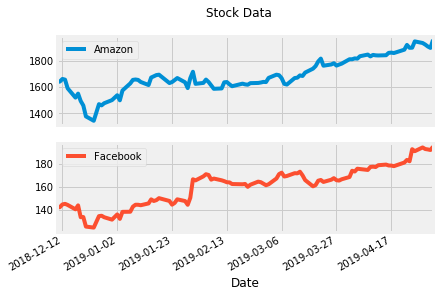

In [249]:
# visualize the stock_data
stock_df.plot(title='Stock Data', subplots=True)

# summarize the stock_data
stock_df.describe()


### 6. Visualize & summarize daily values for the S&P 500
<p>Let's also take a closer look at the value of the S&amp;P 500, our benchmark.</p>

,S&P 500
count,100.000000
mean,2737.073393
std,142.988876
min,2351.100100
25%,2637.485000
50%,2775.240000
75%,2839.519900
max,2945.830100


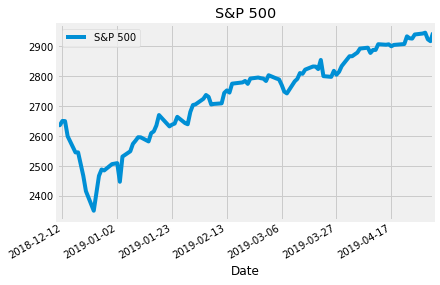

In [250]:
# plot the benchmark_data
sp500_df.plot(title='S&P 500')

# summarize the benchmark_data
sp500_df.describe()


### 7. The inputs for the Sharpe Ratio: Starting with Daily Stock Returns
<p>The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.</p>
<p>However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio. Can you already guess the result?</p>

          Amazon   Facebook
count  99.000000  99.000000
mean    0.002033   0.003507
std     0.021363   0.023240
min    -0.057077  -0.072532
25%    -0.006937  -0.007104
50%     0.001714   0.001201
75%     0.012222   0.011993
max     0.094452   0.108164


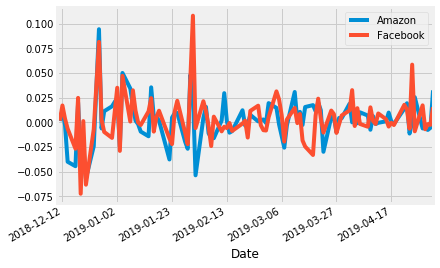

In [252]:
# calculate daily stock_data returns
stock_returns = stock_df.pct_change(fill_method='ffill')

# summarize the daily returns
print(stock_returns.describe())

# plot the daily returns

stock_returns.plot()

plt.show()



### 8. Daily S&P 500 returns
<p>For the S&amp;P 500, calculating daily returns works just the same way, we just need to make sure we select it as a <code>Series</code> using single brackets <code>[]</code> and not as a <code>DataFrame</code> to facilitate the calculations in the next step.</p>

count    99.000000
mean      0.001167
std       0.010162
min      -0.027112
25%      -0.002162
50%       0.001047
75%       0.006510
max       0.049594
Name: S&P 500, dtype: float64


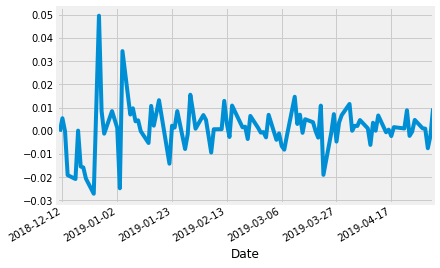

In [257]:
# calculate daily benchmark_data returns
sp_returns = sp500_df['S&P 500'].pct_change(fill_method='ffill')

# summarize the daily returns
print(sp_returns.describe())

# plot the daily returns
sp_returns.plot()
plt.show()


### 9. Calculating Excess Returns for Amazon and Facebook vs. S&P 500
<p>Next, we need to calculate the relative performance of stocks vs. the S&amp;P 500 benchmark. This is calculated as the difference in returns between <code>stock_returns</code> and <code>sp_returns</code> for each day.</p>

          Amazon   Facebook
count  99.000000  99.000000
mean    0.000866   0.002341
std     0.014136   0.019292
min    -0.054717  -0.057137
25%    -0.006437  -0.006120
50%     0.000783  -0.000113
75%     0.007714   0.012371
max     0.044858   0.099566


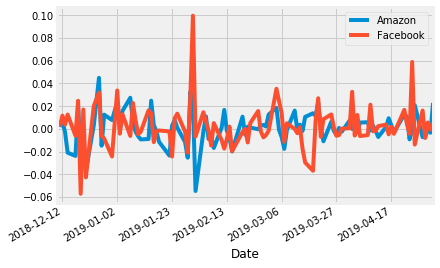

In [258]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# summarize the excess_returns
print(excess_returns.describe())
# plot the , excess_returns
#print (excess_returns.head())
excess_returns.plot()

plt.show()


### 10. The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500
<p>Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the <code>excess_returns</code>. This tells us how much more or less the investment yields per day compared to the benchmark.</p>

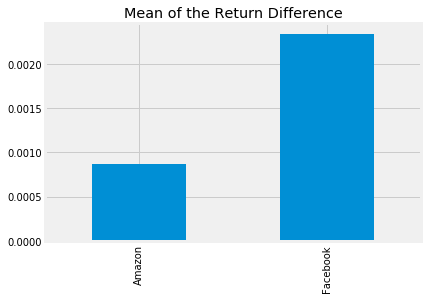

In [259]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Mean of the Return Difference')

plt.show()

### 11. The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference
<p>It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.</p>
<p>Next, we calculate the standard deviation of the <code>excess_returns</code>. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&amp;P 500.</p>

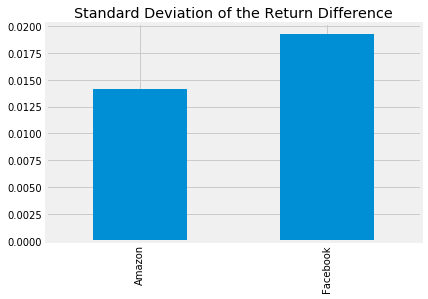

In [240]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference')

plt.show()

### 12. Putting it all together
<p>Now we just need to compute the ratio of <code>avg_excess_returns</code> and <code>sd_excess_returns</code>. The result is now finally the <em>Sharpe ratio</em> and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.</p>
<p>The Sharpe Ratio is often <em>annualized</em> by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252</p>

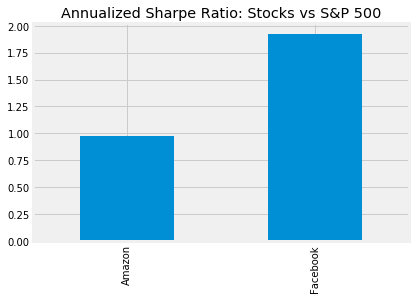

In [241]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title = 'Annualized Sharpe Ratio: Stocks vs S&P 500')

plt.show()

### 13. Conclusion
<p>Given the two Sharpe ratios, which investment should we go for? Till 05/2019, Facebook had a Sharpe ratio twice as high as Amazon. This means that an investment in Facebook returned twice as much compared to the S&amp;P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Facebook would have been more attractive.</p>
<p>This difference was mostly driven by differences in return rather than risk between Amazon and Facebook. The risk of choosing FB over Amazon (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for Facebook. </p>
<p>When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.</p>